In [11]:
import shap
from shap.datasets import iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [2]:
# laod the date

x, y = iris(display=True)

In [3]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
y

['setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',


In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
# encode the target variable if it's categorical
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [16]:
#distribution of target in train and test
pd.Series(y_train).value_counts(normalize=True)

1    0.341667
0    0.333333
2    0.325000
Name: proportion, dtype: float64

In [22]:
# fit a random forest classifier
rf = RandomForestClassifier( random_state=42)
rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [23]:
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

In [24]:
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

Train Accuracy: 1.0
Test Accuracy: 1.0


In [26]:
# make a SHAP explainer
explainer = shap.TreeExplainer(model=rf, data=X_train,model_output="probability")

In [27]:
# base value
explainer.expected_value

array([0.3507, 0.3246, 0.3247])

In [32]:
# calculate Base values for each class manually

rf.predict_proba(X_train).mean(axis=0)

array([0.33391667, 0.34508333, 0.321     ])

Base value is not matching calculated shap values becasue the algorithm sample 100 row by default.
To see if the values are matching we can sample data <100.


In [34]:
explainer = shap.TreeExplainer(model=rf, data=X_train.iloc[:100],model_output="probability")
explainer.expected_value

array([0.3606, 0.349 , 0.2904])

In [35]:
rf.predict_proba(X_train.iloc[:100]).mean(axis=0)

array([0.3606, 0.349 , 0.2904])

Now we can see the values are matching

In [36]:
explainer.expected_value

array([0.3606, 0.349 , 0.2904])

In [58]:
test_Case = X_test.iloc[0:1,:]
test_Case

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2


In [59]:
# predict the test case
prediction = rf.predict(test_Case)
prediction_prob = rf.predict_proba(test_Case)

In [60]:
prediction

array([1])

In [61]:
le.inverse_transform(prediction)

array(['versicolor'], dtype='<U10')

In [62]:
prediction_prob

array([[0.  , 0.99, 0.01]])

In [63]:
# calculate SHAP values
shap_values = explainer(test_Case)
shap_values

.values =
array([[[-0.011     ,  0.030075  , -0.019075  ],
        [-0.0056    , -0.00195833,  0.00755833],
        [-0.17123333,  0.31412499, -0.14289166],
        [-0.17276666,  0.29725833, -0.12449166]]])

.base_values =
array([[0.3606, 0.349 , 0.2904]])

.data =
array([[6.1, 2.8, 4.7, 1.2]])

In [64]:
shap_values

.values =
array([[[-0.011     ,  0.030075  , -0.019075  ],
        [-0.0056    , -0.00195833,  0.00755833],
        [-0.17123333,  0.31412499, -0.14289166],
        [-0.17276666,  0.29725833, -0.12449166]]])

.base_values =
array([[0.3606, 0.349 , 0.2904]])

.data =
array([[6.1, 2.8, 4.7, 1.2]])

In [65]:
shap_values.values[0,:,1]  # SHAP values for class 1

array([ 0.030075  , -0.00195833,  0.31412499,  0.29725833])

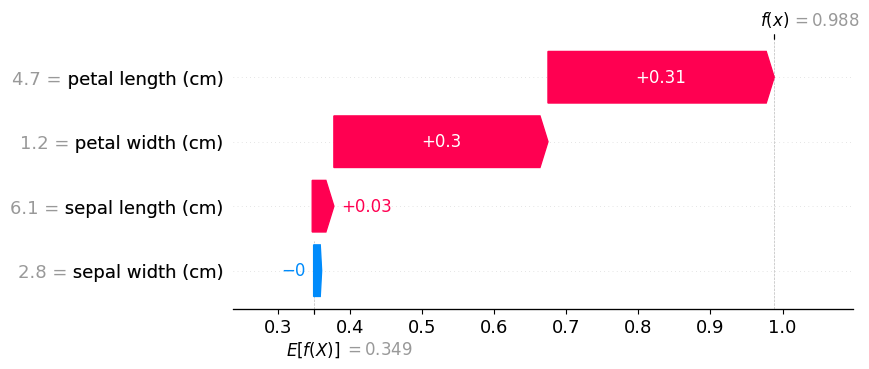

In [66]:
shap.waterfall_plot(shap_values[0,:,1], max_display=10)

In [ ]:
*8////89568991+9856333
38888888888888888888+*5444444444\7/


















